# Tech Stock Prices
This dataset consists of the daily stock prices and volume of ten different tech companies: Apple (AAPL), Amazon (AMZN), Alibaba (BABA), Salesforce (CRM), Facebook (FB), Alphabet (GOOG), Intel (INTC), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA).

There are ten CSV files in the `data/` folder named with the stock symbol for each of the ten companies listed above. 
Looking for another company? You can download it from [Yahoo Finance](https://finance.yahoo.com/) and upload it to your workspace.

Not sure where to begin? Scroll to the bottom to find challenges!

## Data Dictionary

| Column    | Explanation                                                                            |
| --------- | -------------------------------------------------------------------------------------- |
| Date      | Date of observation                                                                    |
| Open      | Opening price                                                                          |
| High      | Highest price during trading day                                                       |
| Low       | Lowest price during trading day                                                        |
| Close     | Close price                                                                            |
| Adj Close | Adjusted close price adjusted for splits and dividend and/or capital gain distribution |
| Volume    | Number of shares traded during trading day                                             |

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which of the ten companies has the highest closing price based on the most recent data?
- 📊 **Visualize**: Create a plot that visualizes the closing price at the end of each month for the 10 tech stocks.
- 🔎 **Analyze**: Which of the ten companies have experienced the greatest percent increase in closing price over the course of their existence?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have been hired as an analyst for a small investment firm. They currently specialize in commodities, focusing on coffee, cocoa, and sugar. However, they are now interested in expanding to technology companies. Your manager has asked you to explore the returns and volatilities of the ten stocks provided and contrast them with the three commodities they currently invest in. 

They also want you to recommend how tech stocks could be integrated into a portfolio with the existing commodities they invest in to minimize risk while gaining exposure to the new market.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

Commodity prices can be found [here](https://finance.yahoo.com/commodities/).

In [2]:
import pandas as pd
aapl = pd.read_csv("data/AAPL.csv")
aapl.name = 'AAPL'
amzn = pd.read_csv("data/AMZN.csv")
amzn.name = 'AMZN'
baba = pd.read_csv("data/BABA.csv")
baba.name = 'BABA'
crm = pd.read_csv("data/CRM.csv")
crm.name = 'CRM'
fb = pd.read_csv("data/FB.csv")
fb.name = 'FB'
goog = pd.read_csv("data/GOOG.csv")
goog.name = 'GOOG'
intc = pd.read_csv("data/INTC.csv")
intc.name = 'INTC'
msft = pd.read_csv("data/MSFT.csv")
msft.name = 'MSFT'
nvda = pd.read_csv("data/NVDA.csv")
nvda.name = 'NVDA'
tsla = pd.read_csv("data/TSLA.csv")
tsla.name = 'TSLA'

# Changing the date format and finding the most recent date
list_stocks = [aapl, amzn, baba, crm, fb, goog, intc, msft, nvda, tsla]
for stocks in list_stocks:
    stocks['Date'] = pd.to_datetime(stocks['Date'])
    stocks['Date'] = stocks['Date'].dt.strftime('%d %b %Y')
    print(stocks.head(10))
    most_recent_date = stocks['Date'].iloc[-1]
    print("Most recent date of", stocks.name, ":", most_recent_date)

          Date      Open      High       Low     Close  Adj Close     Volume
0  04 Jan 2010  7.622500  7.660714  7.585000  7.643214   6.553025  493729600
1  05 Jan 2010  7.664286  7.699643  7.616071  7.656429   6.564355  601904800
2  06 Jan 2010  7.656429  7.686786  7.526786  7.534643   6.459939  552160000
3  07 Jan 2010  7.562500  7.571429  7.466071  7.520714   6.447999  477131200
4  08 Jan 2010  7.510714  7.571429  7.466429  7.570714   6.490865  447610800
5  11 Jan 2010  7.600000  7.607143  7.444643  7.503929   6.433607  462229600
6  12 Jan 2010  7.471071  7.491786  7.372143  7.418571   6.360425  594459600
7  13 Jan 2010  7.423929  7.533214  7.289286  7.523214   6.450142  605892000
8  14 Jan 2010  7.503929  7.516429  7.465000  7.479643   6.412785  432894000
9  15 Jan 2010  7.533214  7.557143  7.352500  7.354643   6.305614  594067600
Most recent date of AAPL : 30 Nov 2021
          Date        Open        High  ...       Close   Adj Close    Volume
0  04 Jan 2010  136.250000  136.6100

[Source](https://finance.yahoo.com/) of dataset.

In [3]:
# Which of the ten companies has the highest closing price in the most recent date (2021)

results = []

for stocks in list_stocks:
    stocks['Date'] = pd.to_datetime(stocks['Date'])
    stocks_2021 = stocks[stocks["Date"].dt.year == 2021]
    highest_closing = stocks_2021['Close'].max()
    date_hcl = stocks_2021.loc[stocks_2021['Close'] == highest_closing, 'Date'].iloc[0] # iloc used for data value extraction
    date_hcl = date_hcl.strftime('%d %b') # Formatting

    # Append the results
    results.append({
        "stock": stocks.name,
        "date": date_hcl,
        "close": highest_closing
    })

# Convert to DataFrame for better analysis
final_ans = pd.DataFrame(results)

# Find the stock with the highest closing price
highest = final_ans.loc[final_ans["close"].idxmax()] 
print(f"{highest.stock}: {highest.close:.2f} with date: {highest.date} in 2021.")

AMZN: 3731.41 with date: 08 Jul in 2021.


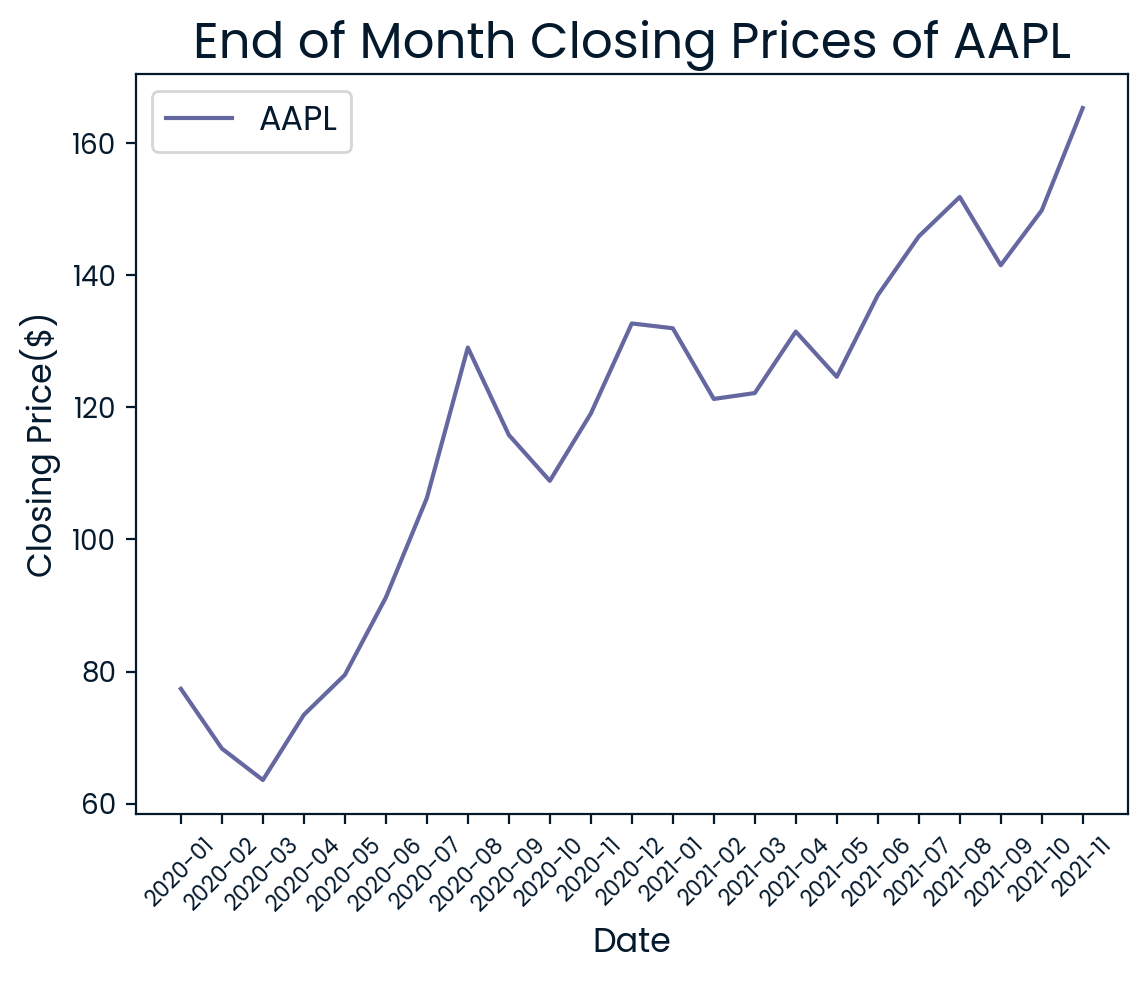

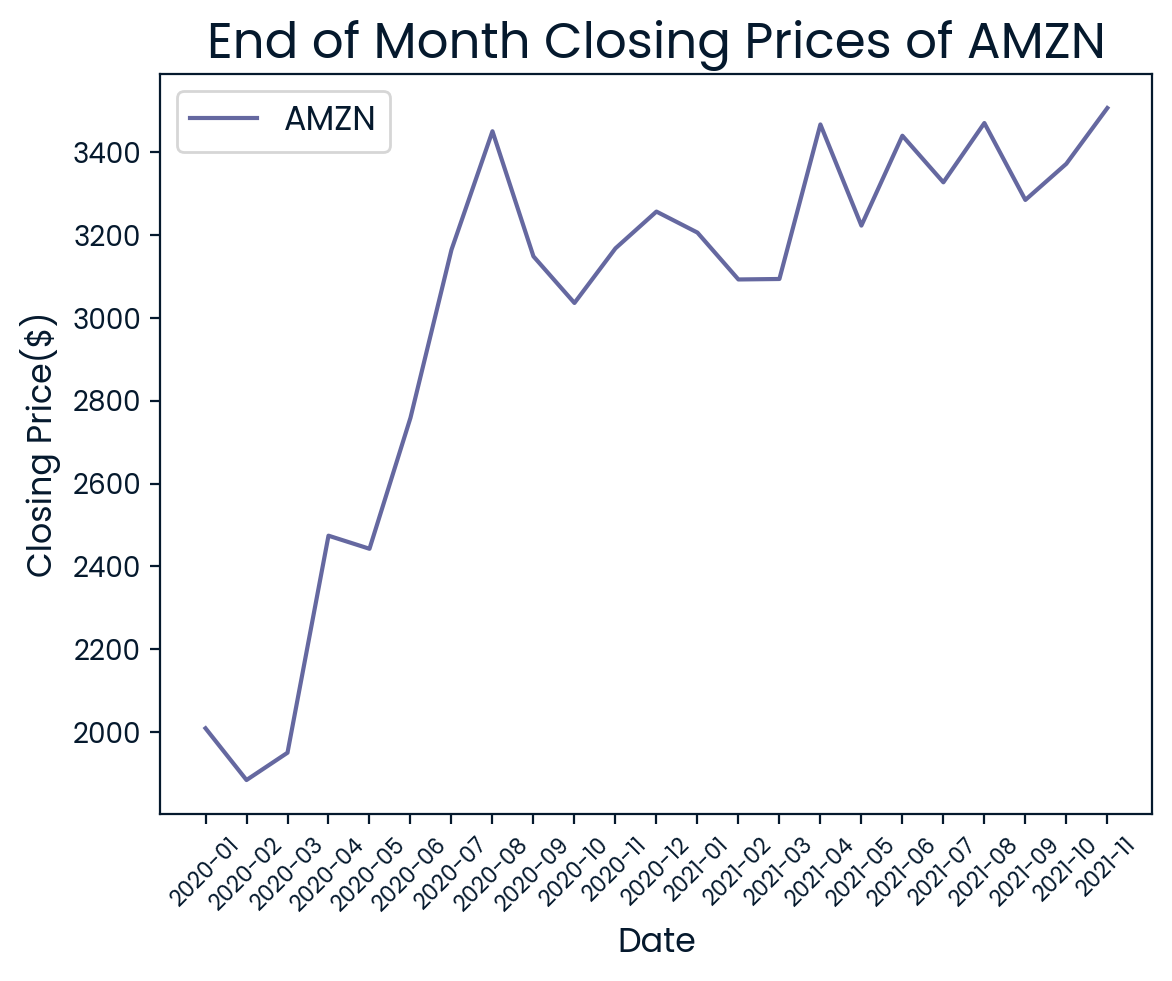

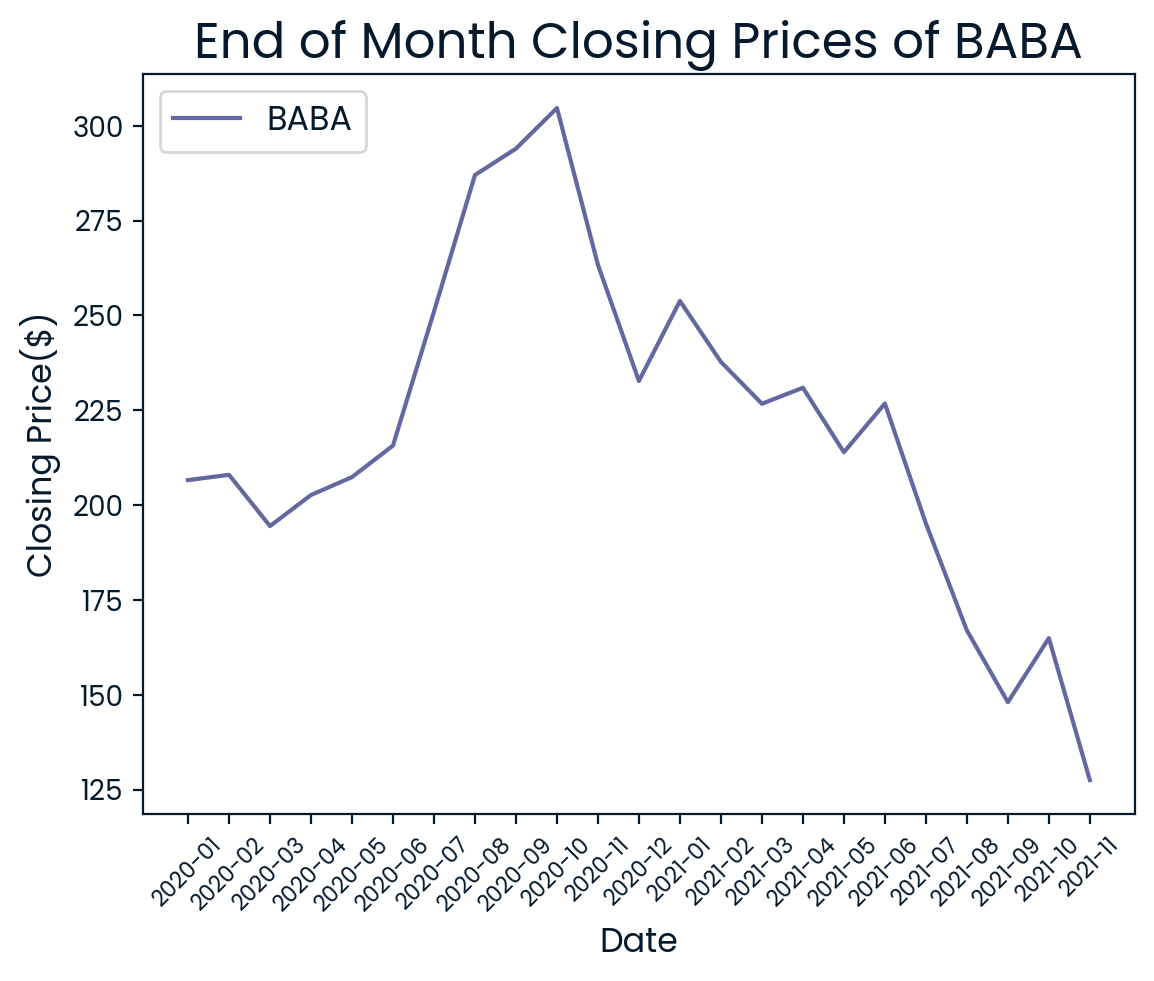

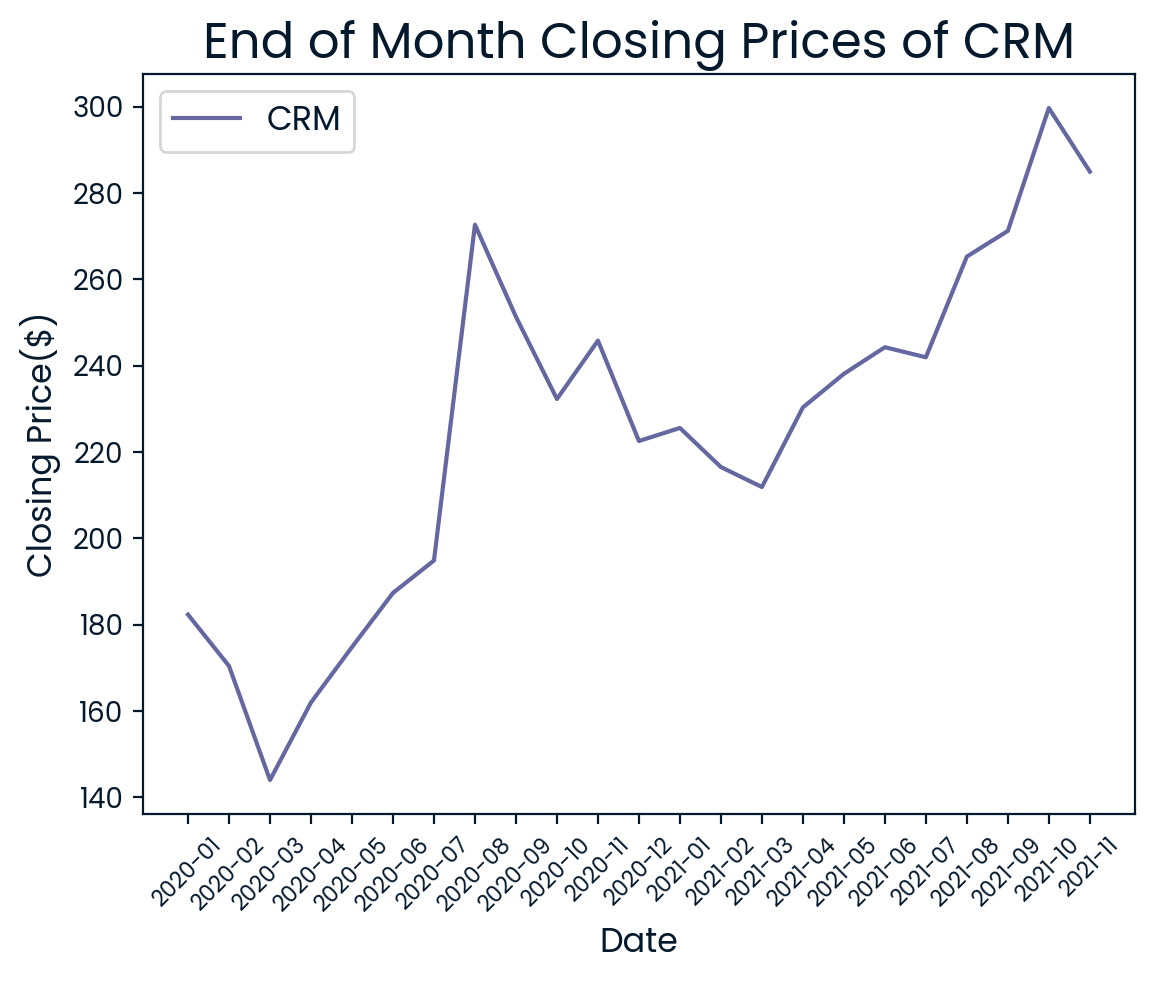

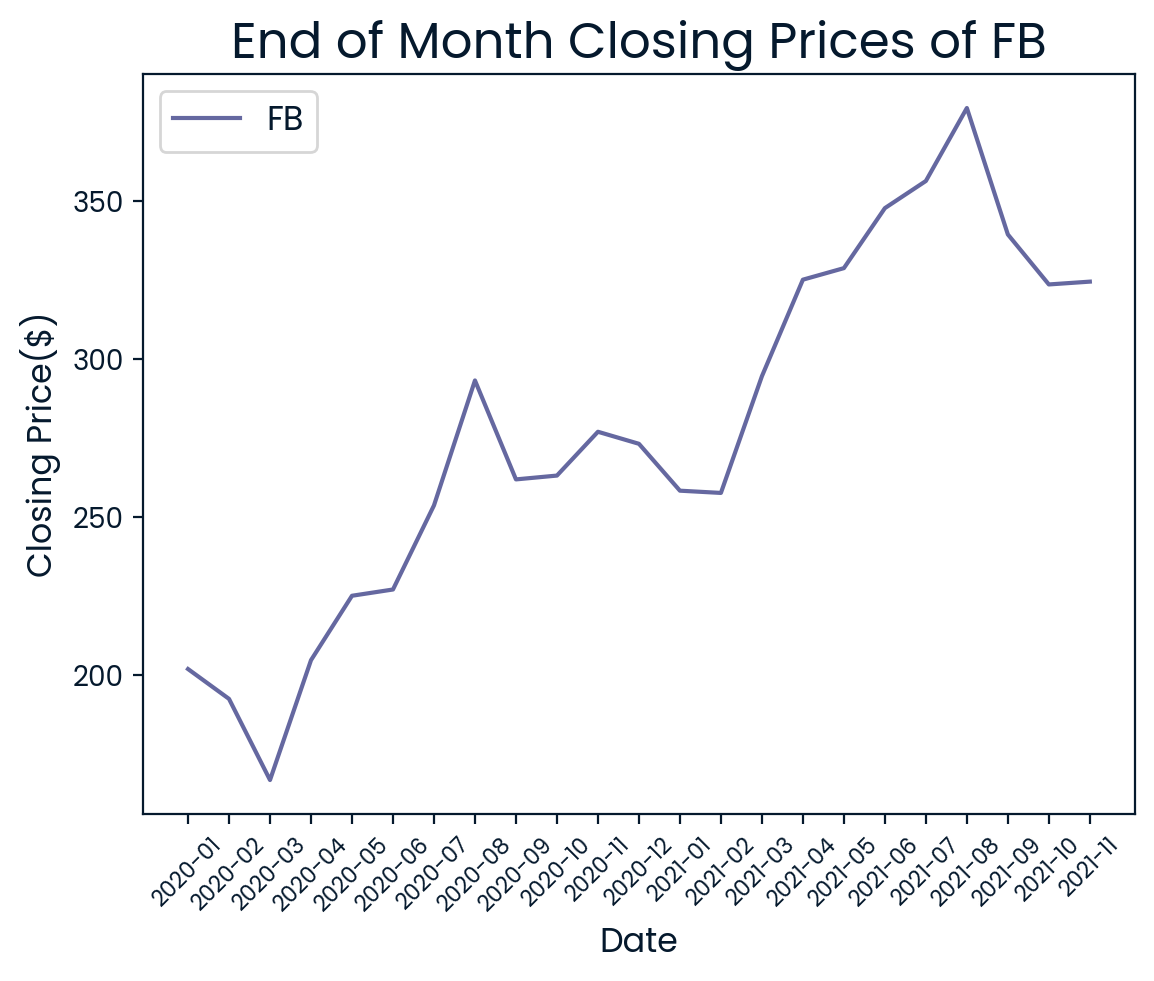

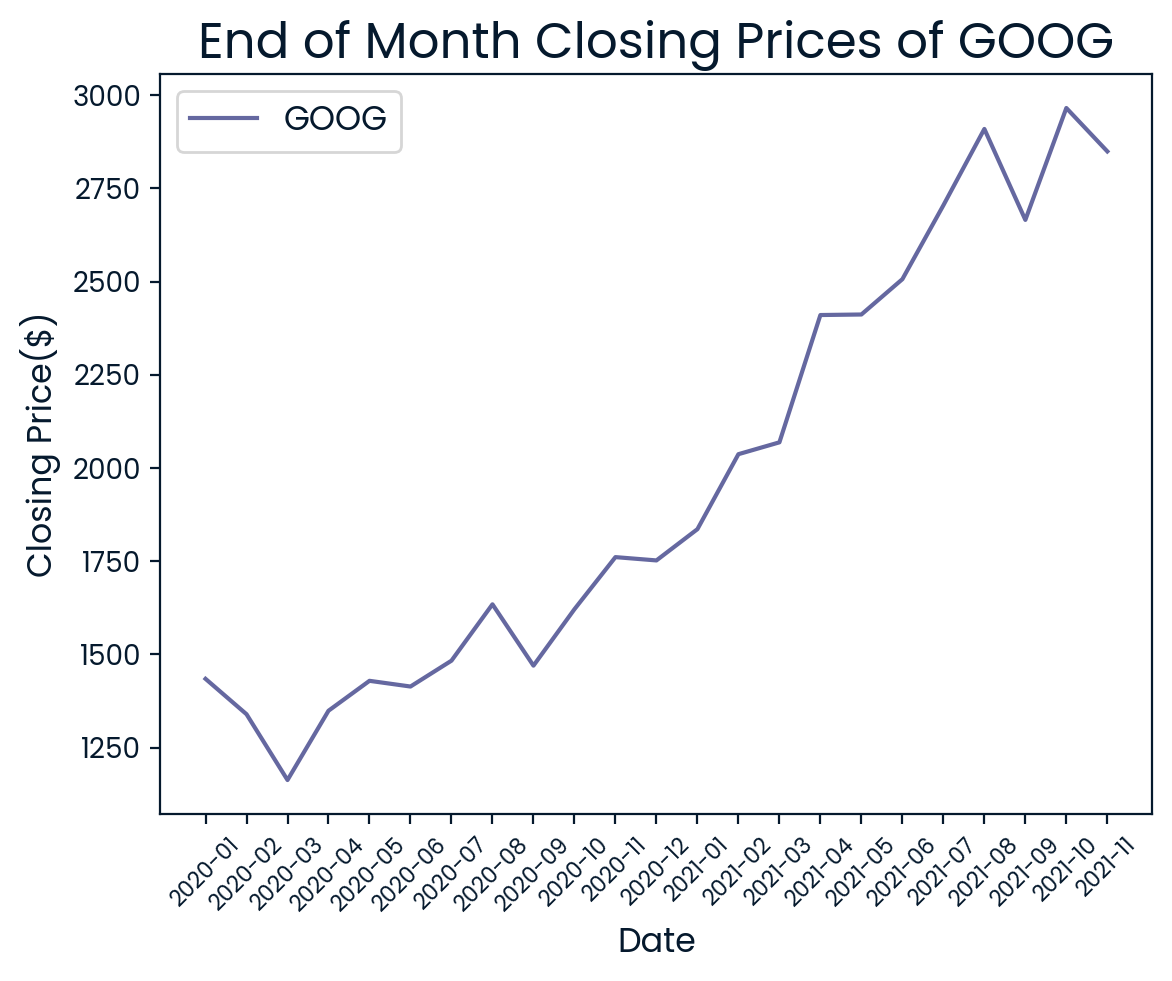

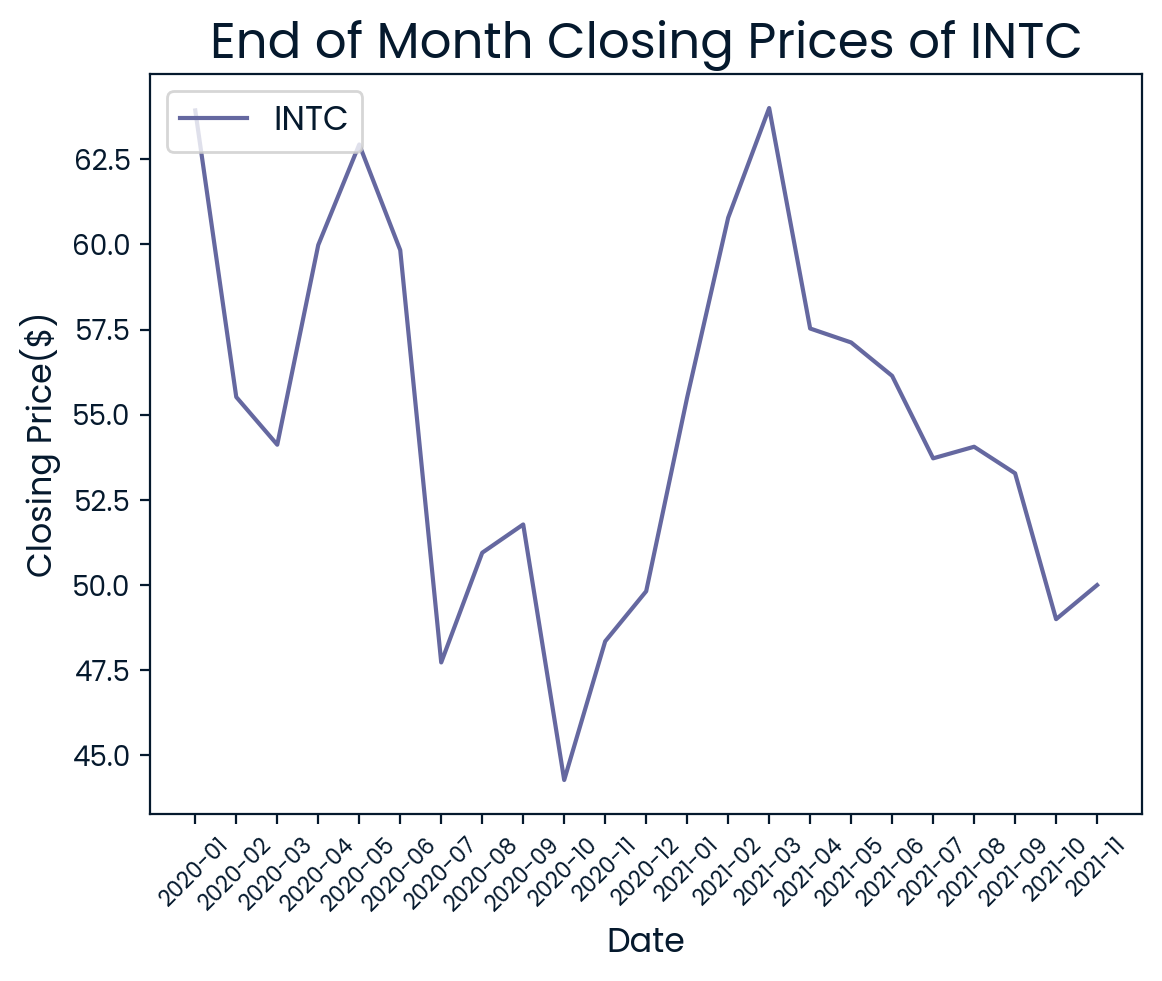

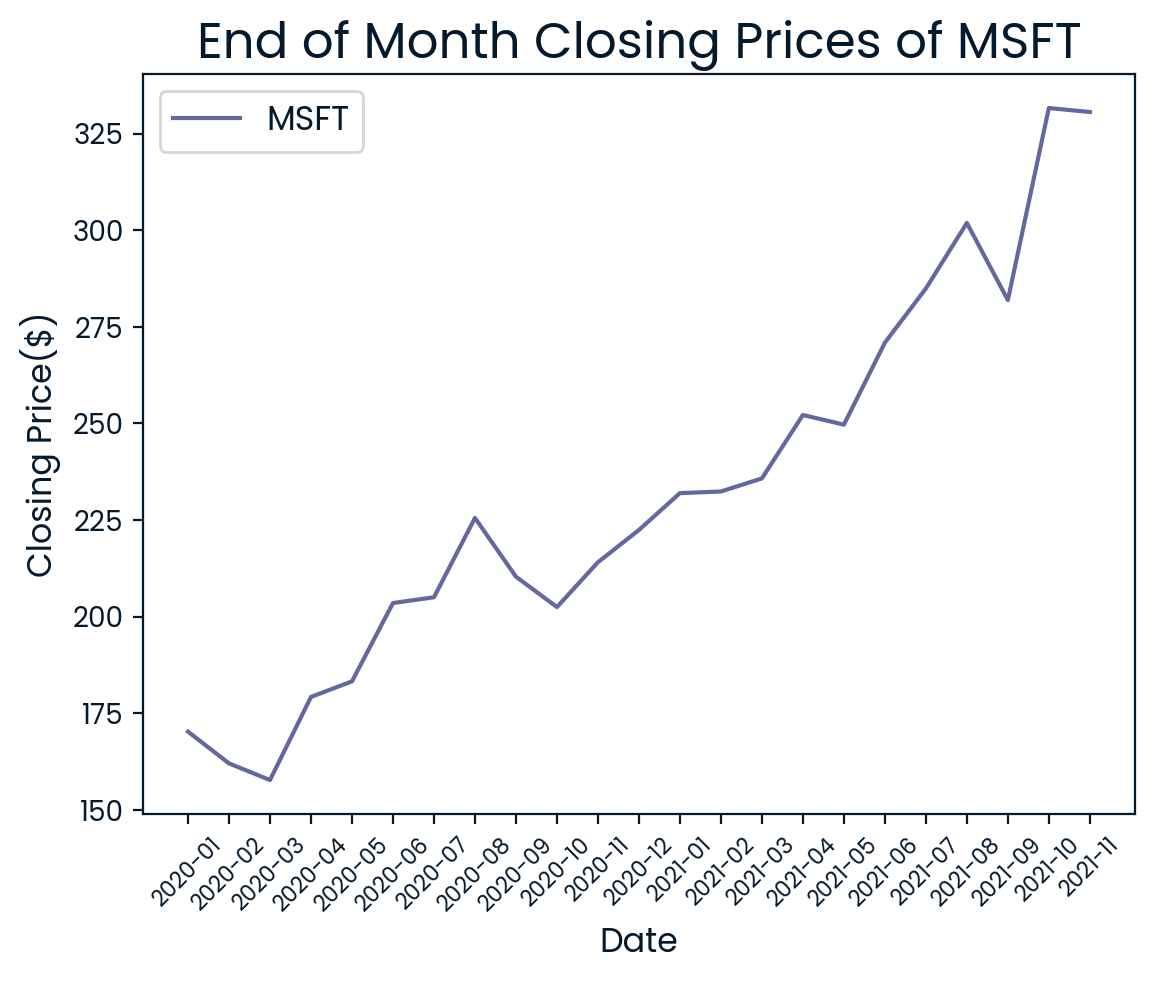

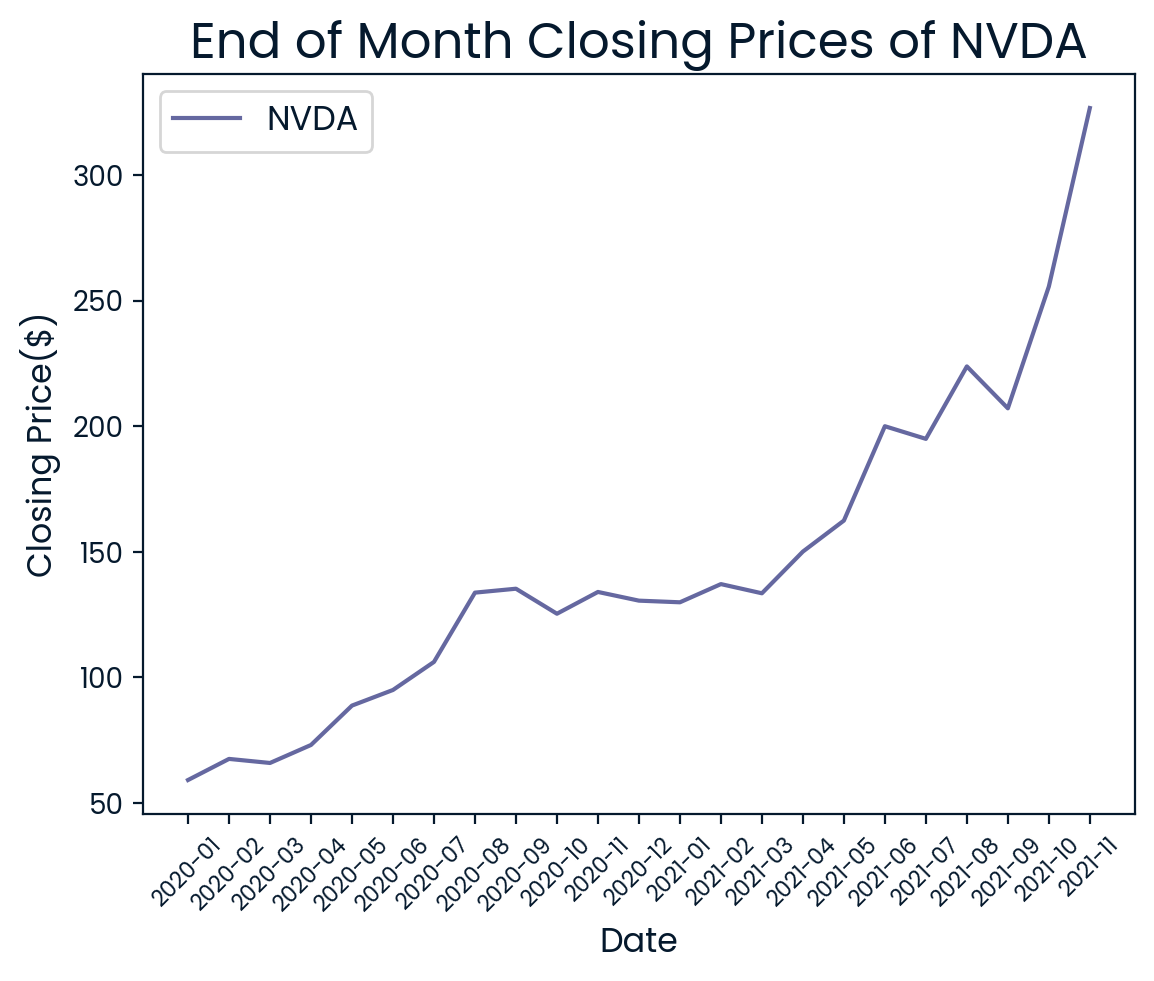

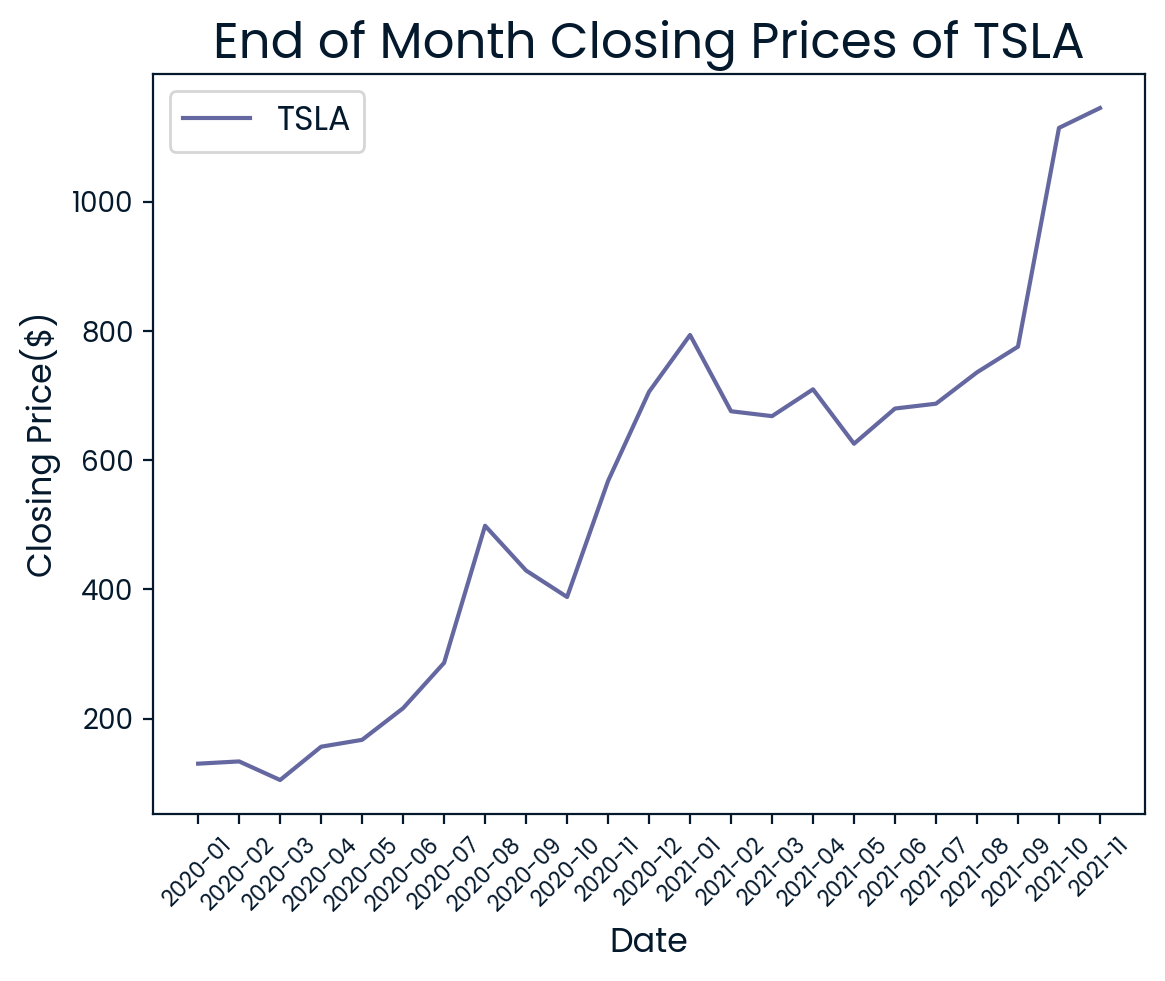

In [5]:
# Create a plot that visualizes the closing price at the end of each month for the 10 tech stocks.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
for stocks in list_stocks:
    stocks['Date'] = pd.to_datetime(stocks['Date'])
    stocks_20_21 = stocks[stocks["Date"].dt.year.isin([2020, 2021])]
    eom_close = {}
    for (year, month), group in stocks_20_21.groupby([stocks_20_21['Date'].dt.year, stocks_20_21['Date'].dt.month]):
        last_day = group.iloc[-1]
        eom_close[f"{year}-{month:02d}"] = last_day['Close']
    eom_df = pd.DataFrame.from_dict(eom_close, orient='index', columns=['Close'])
    eom_df = eom_df.reset_index().rename(columns={'index': 'Date'})
    plt.plot(eom_df['Date'], eom_df['Close'], linestyle='-', 
             label=stocks.name, markersize=5)
    plt.title(f"End of Month Closing Prices of {stocks.name}", fontsize=18)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Closing Price($)', fontsize=12)
    plt.legend(fontsize=12, loc='upper left')
    plt.xticks(rotation=45, fontsize=8)
    plt.show()

In [4]:
# Which of the ten companies have experienced the greatest percent increase in closing price over the course of their existence?

results = []

for stocks in list_stocks:
    stocks['Date'] = pd.to_datetime(stocks['Date'])
    stocks['Daily Return'] = stocks['Close'].pct_change() * 100
    
    max_increase = stocks['Daily Return'].max()
    max_increase_date = stocks.loc[stocks['Daily Return'].idxmax(), 'Date']
    max_increase_date = max_increase_date.strftime('%d %b %Y')

    results.append({
        "stock": stocks.name,
        "date": max_increase_date,
        "pct": max_increase
    })


final_ans = pd.DataFrame(results)
highest = final_ans.loc[final_ans["pct"].idxmax()]

print(f"{highest.stock} has the highest percent increase in closing price with {highest.pct:.2f}% on {highest.date}") 

NVDA has the highest percent increase in closing price with 29.81% on 11 Nov 2016
